# Sales Project

Analyze the company's sales data for the fourth quarter acoss Australia, and State by State and help the company make data driven decisions for the coming year. 
- Determine the states that are generating the highest revenues 
- Formulate sales programs for states with lower revenues. 

In [120]:
#pip install sklearn.preprocessing

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [19]:
#Read in the dataset 
salesdf = pd.read_csv("AusApparalSales4thQrt2020.csv")
salesdf.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


## Data Wrangling

Ensure that the data is clean and that there is no missing or incorrect data. Inspect the data manually for missing/incorrect data using the functions isna(), and notna().

**Chandni's Analysis**
- No data is missing from any variable so imputations is not necessary. 
- Variables Unit and Sales are both right-skewed (positive skew) and have outliers, and therefore need to be normalized

In [20]:
salesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [21]:
salesdf.dtypes

Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object

In [22]:
colnames = salesdf.columns
print(colnames)

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')


In [23]:
for feature in colnames: 
    countofmissing = salesdf[feature].isna().sum()
    print(f"The variable {feature} has {countofmissing} missing values.")

The variable Date has 0 missing values.
The variable Time has 0 missing values.
The variable State has 0 missing values.
The variable Group has 0 missing values.
The variable Unit has 0 missing values.
The variable Sales has 0 missing values.


In [24]:
salesdf["Time"].value_counts().count()

3

In [25]:
for feature in colnames[:-2]:
    print(f"The variable, {feature} has {salesdf[feature].value_counts().count()} values. Here are the # of instances for each value:")
    print(salesdf[feature].value_counts())
    print(' ')

The variable, Date has 90 values. Here are the # of instances for each value:
Date
1-Oct-2020     84
8-Dec-2020     84
6-Dec-2020     84
5-Dec-2020     84
4-Dec-2020     84
               ..
29-Oct-2020    84
28-Oct-2020    84
27-Oct-2020    84
26-Oct-2020    84
30-Dec-2020    84
Name: count, Length: 90, dtype: int64
 
The variable, Time has 3 values. Here are the # of instances for each value:
Time
Morning      2520
Afternoon    2520
Evening      2520
Name: count, dtype: int64
 
The variable, State has 7 values. Here are the # of instances for each value:
State
WA     1080
NT     1080
SA     1080
VIC    1080
QLD    1080
NSW    1080
TAS    1080
Name: count, dtype: int64
 
The variable, Group has 4 values. Here are the # of instances for each value:
Group
Kids       1890
Men        1890
Women      1890
Seniors    1890
Name: count, dtype: int64
 


In [26]:
#Check that all values in Dates are valid dates. 
colnames[4:]

Index(['Unit', 'Sales'], dtype='object')

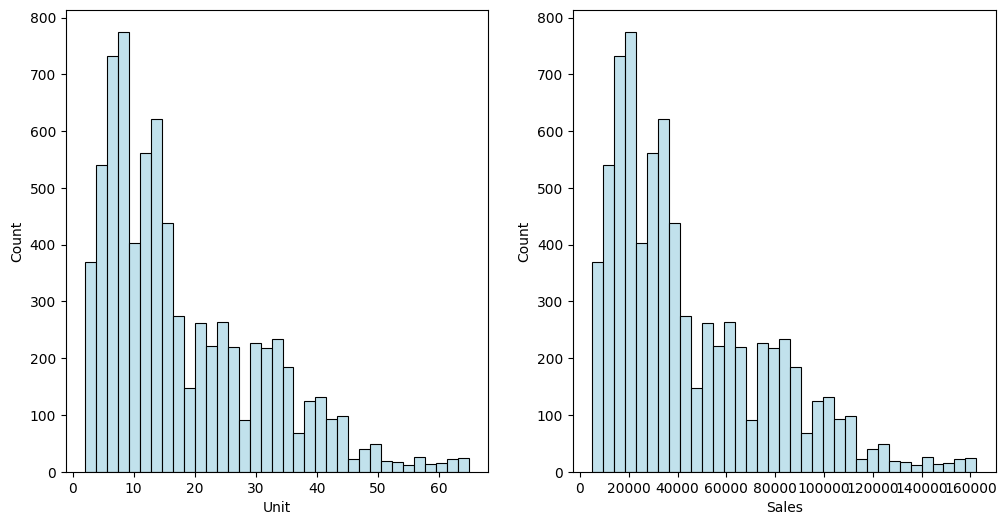

In [27]:
#Check countinuous variables, Unit and Sales, if they need to be normalized 
#Create a grid with 6 plots: 1 row, 2 columns 

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(12,6))

index = 0 
axs = axs.flatten()
for feature in colnames[4:]:
    sns.histplot(data=salesdf,x=feature, ax=axs[index],color="lightblue")
    index +=1 


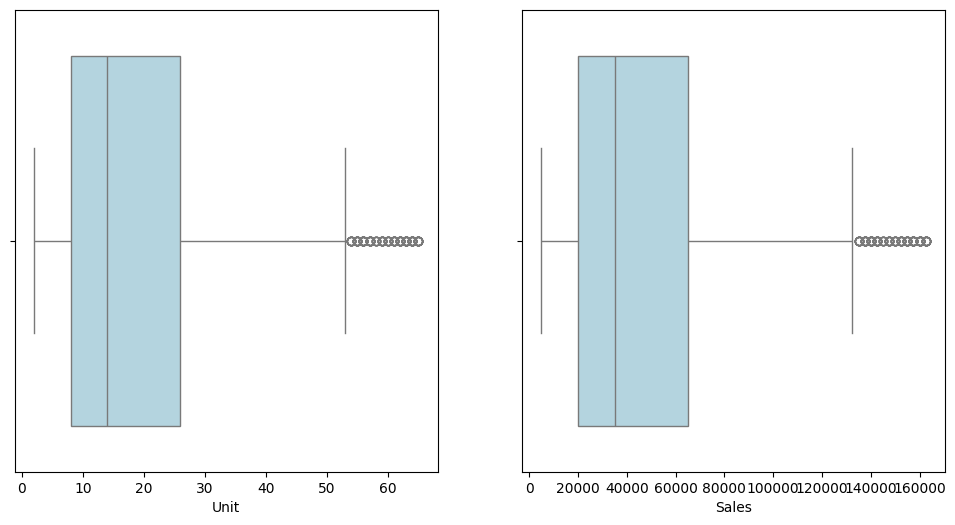

In [28]:
#Check for outliers 
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(12,6))

index = 0 
axs = axs.flatten()
for feature in colnames[4:]:
    sns.boxplot(data=salesdf,x=feature, ax=axs[index],color="lightblue")
    index +=1 

In [29]:
#normalize Unit and Sales data by first removing highest 5% of data since that's where the outliers exist. 
upperlimit_unit = np.percentile(salesdf['Unit'],95)
upperlimit_sales = np.percentile(salesdf['Sales'],95)

mask = (salesdf['Unit']<upperlimit_unit) & (salesdf['Sales']<upperlimit_sales)

salesdf2 = salesdf[mask]

print(f'we removed {salesdf.shape[0]-salesdf2.shape[0]} outliers (which is {round(((salesdf.shape[0]-salesdf2.shape[0])/salesdf.shape[0])*100,2)}% removed) from the dataset.')

we removed 404 outliers (which is 5.34% removed) from the dataset.


In [33]:
#normalize 
MMS = MinMaxScaler()
scaled_data = MMS.fit_transform(salesdf2)

ValueError: could not convert string to float: '1-Oct-2020'

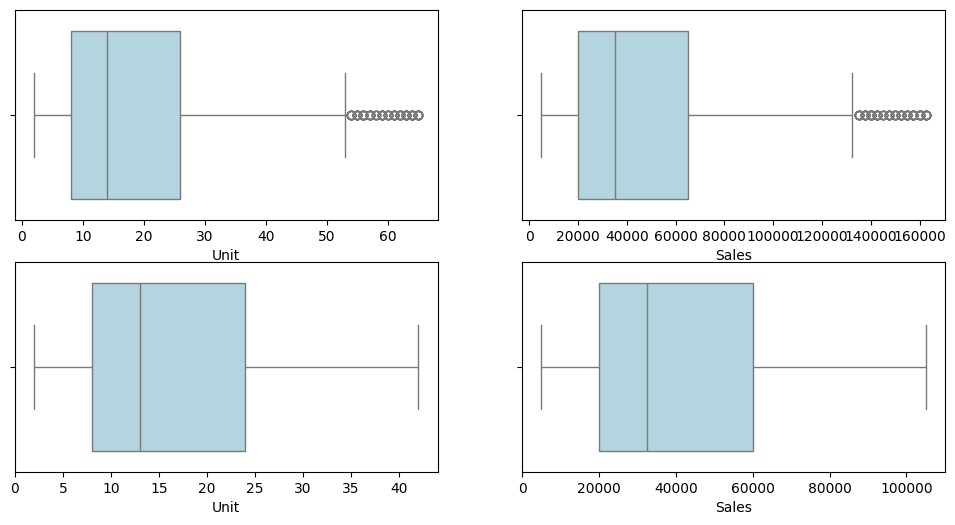

In [ ]:
#Visualize how removing outliers affects the data: boxplot
datasetnames = [salesdf,salesdf2]

fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(12,6))

index = 0 
axs = axs.flatten()
for ds in datasetnames:  
    for feature in colnames[4:]:
        sns.boxplot(data=ds,x=feature, ax=axs[index],color="lightblue")
        index +=1 

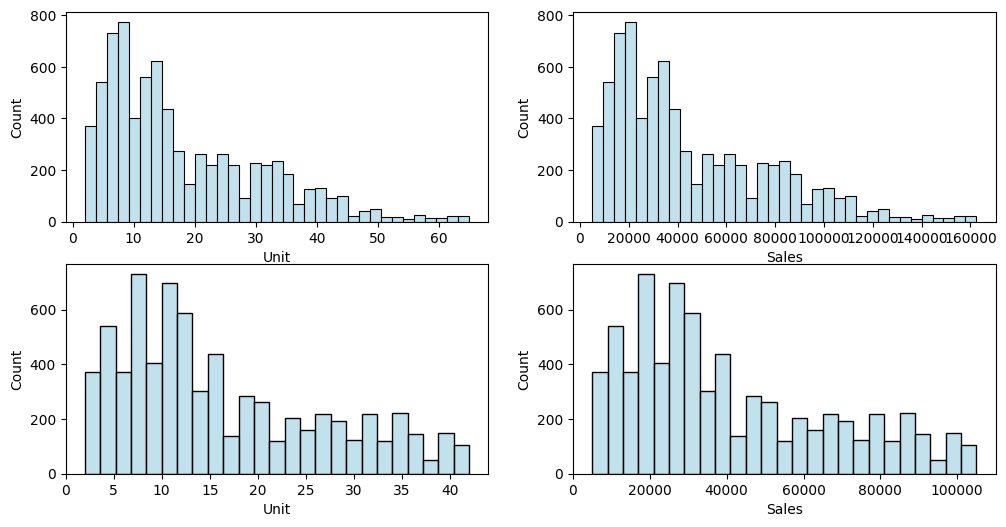

In [ ]:
#Visualize how removing outliers affects the data: histogram
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(12,6))

index = 0 
axs = axs.flatten()
for ds in datasetnames: 
    for feature in colnames[4:]:
        sns.histplot(data=ds,x=feature, ax=axs[index],color="lightblue")
        index +=1 

In [35]:
salesdf2['totalsales'] = salesdf2['Sales']*salesdf2['Unit']


C:\Users\chand\AppData\Local\Temp\ipykernel_82896\1164622791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salesdf2['totalsales'] = salesdf2['Sales']*salesdf2['Unit']


## Data Analysis

In [36]:
#Descriptive Stats
salesdf2.describe()

,Unit,Sales,totalsales
count,7156.000000,7156.000000,7.156000e+03
mean,16.175517,40438.792622,9.303927e+05
std,10.513095,26282.737241,1.091798e+06
min,2.000000,5000.000000,1.000000e+04
25%,8.000000,20000.000000,1.600000e+05
50%,13.000000,32500.000000,4.225000e+05
75%,24.000000,60000.000000,1.440000e+06
max,42.000000,105000.000000,4.410000e+06


In [37]:
salesdf2.groupby(['Group'])["totalsales"].mean()

Group
Kids       919412.836323
Men        946603.852596
Seniors    906374.162946
Women      949171.324762
Name: totalsales, dtype: float64

In [38]:
salesdf2.groupby(['Group'])["totalsales"].median()

Group
Kids       422500.0
Men        422500.0
Seniors    422500.0
Women      422500.0
Name: totalsales, dtype: float64

In [ ]:
unit_sales_corr = np.corrcoef(salesdf2["Unit"],salesdf2["Sales"])
unit_sales_corr

array([[1., 1.],
       [1., 1.]])

<Axes: xlabel='Group', ylabel='totalsales'>

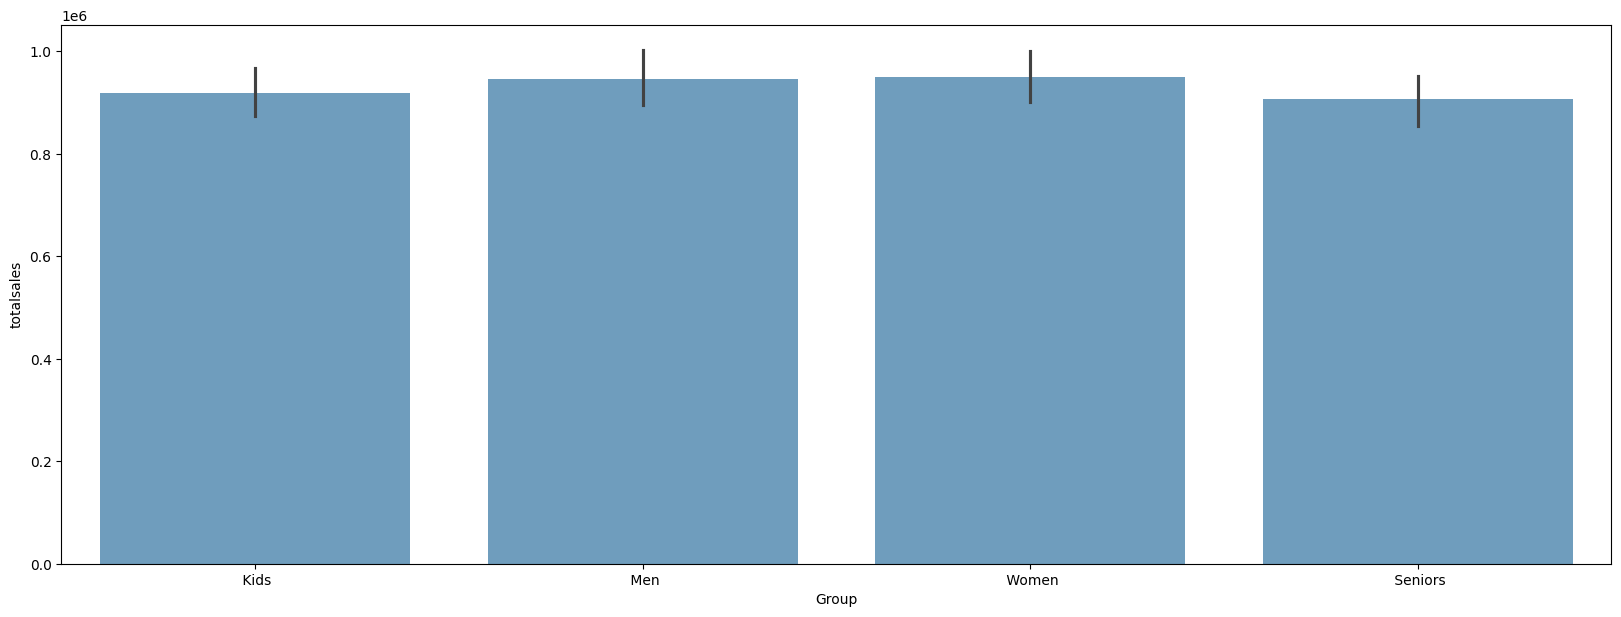

In [43]:
#Group by Sales
plt.figure(figsize=(20,7))
sns.barplot(data=salesdf2,x='Group',y='totalsales'
                #,hue='State'
                ,alpha=0.7)

#sns.barplot(data=salesdf2,y='Sales',x='Group')

In [ ]:
#Run ANOVA
    #H_0: There is no difference in total sales by group 
    #H_A: At least one group has a significantly different mean 

<Axes: xlabel='State', ylabel='totalsales'>

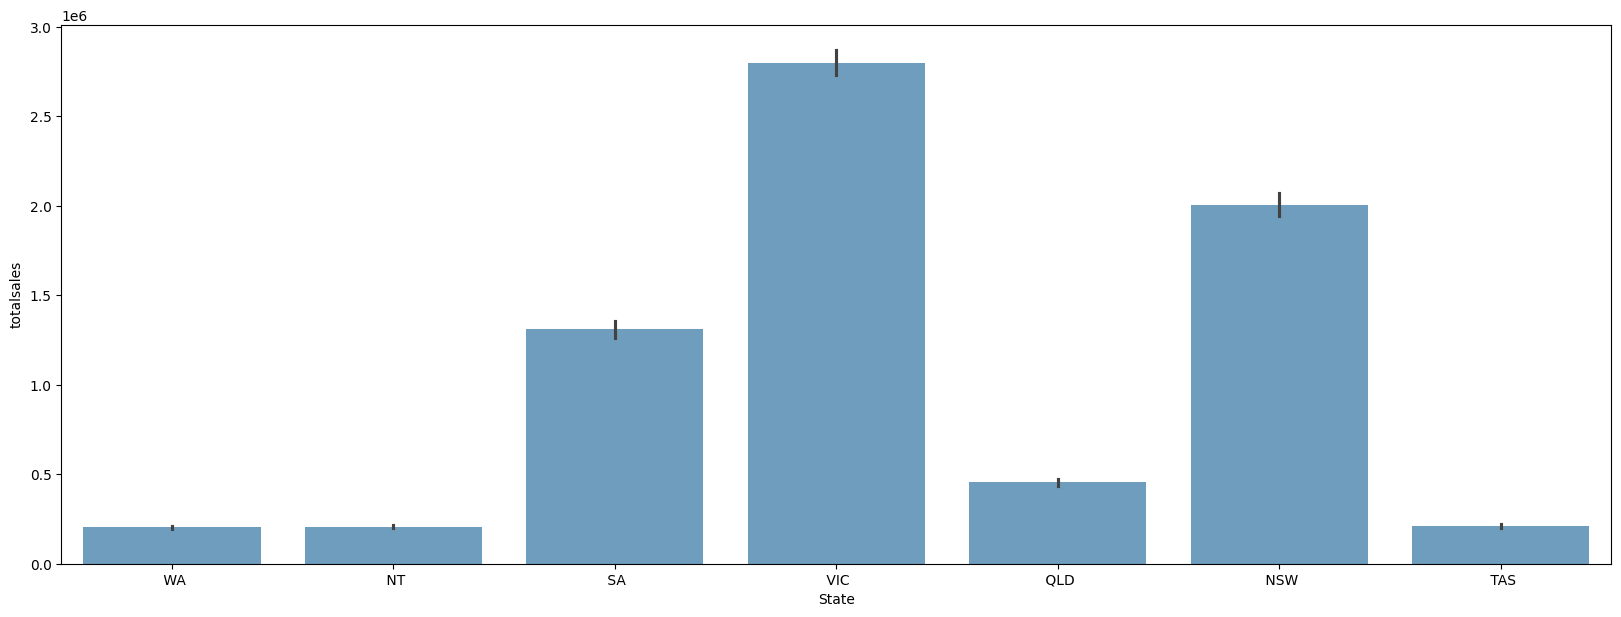

In [44]:
#Group by State
plt.figure(figsize=(20,7))
sns.barplot(data=salesdf2,x='State',y='totalsales'
                #,hue='State'
                ,alpha=0.7)

#sns.barplot(data=salesdf2,y='Sales',x='Group')

<Axes: xlabel='State', ylabel='totalsales'>

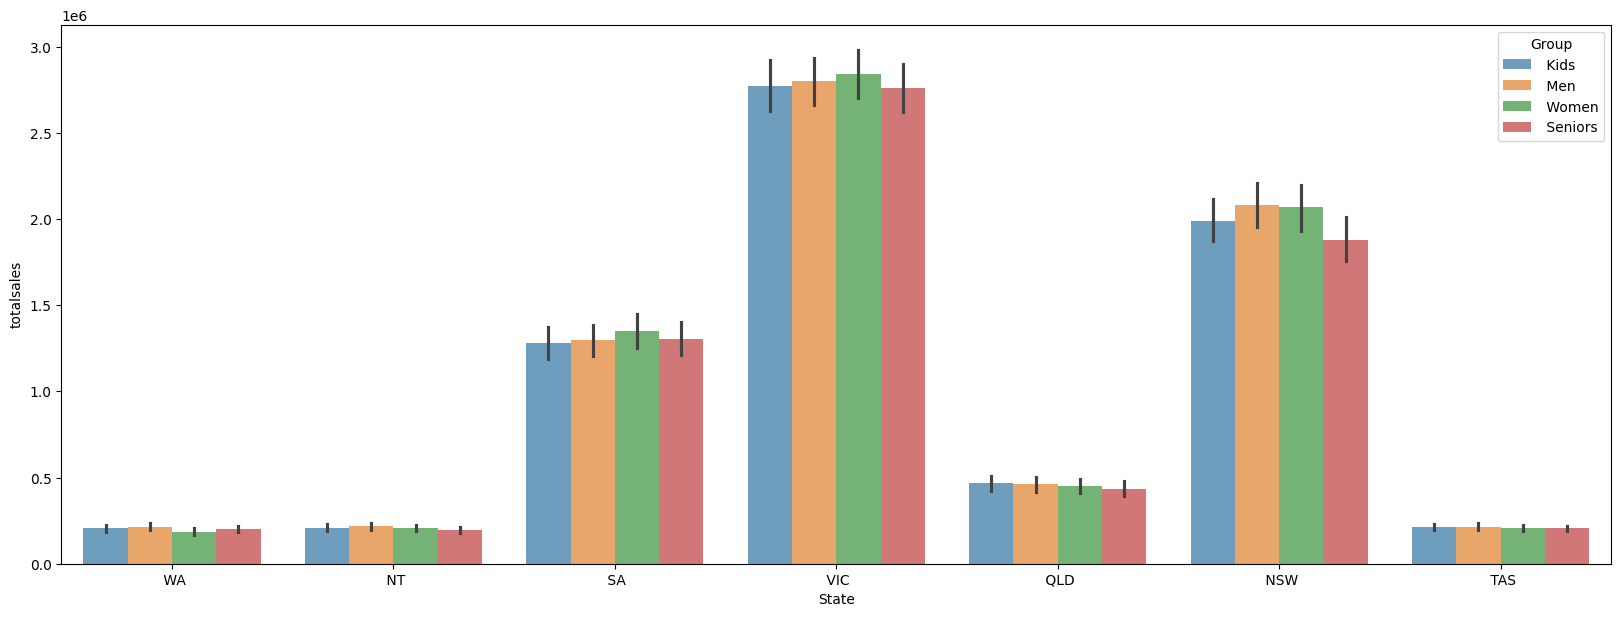

In [45]:
#Group by State and Group
plt.figure(figsize=(20,7))
sns.barplot(data=salesdf2,x='State',y='totalsales'
                ,hue='Group'
                ,alpha=0.7)